<a href="https://colab.research.google.com/github/PV1shal/UniFinder/blob/main/MiningMen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

**Get the CSV:**

In [2]:
url = 'https://drive.google.com/file/d/1m0B-ur9NxnTPGuN_LjHL3mwN72ZYCZB3/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df_admitsFYI = pd.read_csv(url)

In [3]:
df_admitsFYI.head()

,University,Status,Target Major,Term,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,TOEFL/IELTS,UG College,UG Major,GPA,Papers,Work Exp
0,Bowling Green State University,Reject,Computer Science,Fall 2015,135.0,146.0,3.0,281.0,6.0,SIES Graduate School of Technology,Information Technology,56.00,NaN,0 Mo
1,Bowling Green State University,Admit,Computer Science,Spring 2017,170.0,147.0,4.0,317.0,100.0,thapathali engineering campus,ECE,74.80,NaN,0 Mo
2,Bowling Green State University,Admit,Computer Science,Fall 2016,NaN,NaN,NaN,NaN,6.0,mic college of technology,Computer Science,60.00,NaN,0 Mo
3,Bowling Green State University,Reject,Computer Science,Fall 2016,148.0,133.0,3.0,281.0,6.5,Vellore Institute of Technology,Computer Science,7.23,NaN,0 Mo
4,Bowling Green State University,Admit,Computer Science,Spring 2016,147.0,136.0,2.0,283.0,6.0,Gitam University,Computer Science,7.00,NaN,0 Mo


In [4]:
df_admitsFYI.describe()

,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,TOEFL/IELTS,GPA,Papers
count,37867.000000,37869.000000,34981.000000,37862.000000,37603.000000,38612.000000,14644.000000
mean,160.844482,150.359951,3.394412,311.204902,82.039133,31.086302,0.322180
std,5.788238,6.813075,0.836266,10.669447,40.134167,30.256490,0.752966
min,130.000000,130.000000,0.000000,260.000000,0.000000,0.000000,0.000000
25%,157.000000,146.000000,3.000000,304.000000,85.000000,7.800000,0.000000
50%,161.000000,150.000000,3.500000,312.000000,100.000000,8.780000,0.000000
75%,165.000000,155.000000,4.000000,319.000000,108.000000,65.000000,0.000000
max,170.000000,170.000000,6.000000,340.000000,120.000000,100.000000,11.000000


# Cleaning Dataset

### Drops NA columns.

In [5]:
df_admitsFYI.dropna(subset=['GRE Verbal', 'GRE Quantitative', 'GRE Writing', 'GRE Total', 'GPA', ], inplace=True)

### Papers NA changed to 0

In [6]:
df_admitsFYI['Papers'].fillna(0.0, inplace=True)

### 1. Drops useless terms. 

In [7]:
terms_to_drop = [
    "Fall -1", "Nd 2015", "Summer 2013", "Summer 2013", "Spring 2007",
    "Summer 2015", "Spring 2008", "Summer 2011", "Fall 2005", "Nd 2013",
    "Spring 2009", "Spring -1", "-2"
]

In [8]:
df_admitsFYI = df_admitsFYI[~df_admitsFYI['Term'].isin(terms_to_drop)]

df_admitsFYI[['Season', 'Year']] = df_admitsFYI['Term'].str.split(' ', expand=True)

df_admitsFYI.drop(columns=['Term'], inplace=True)

### Drop rows where 'Term' matches any of the terms to drop


# Drop rows where 'Term' matches any of the terms to drop
df_admitsFYI = df_admitsFYI[~df_admitsFYI['Term'].isin(terms_to_drop)]

df_admitsFYI[['Season', 'Year']] = df_admitsFYI['Term'].str.split(' ', expand=True)
df_admitsFYI.drop(['Term'],axis=1, inplace=True)

### GPA standardization.

In [9]:
df_admitsFYI['GPA'] = df_admitsFYI['GPA'].apply(lambda x: (x / 10) * 4 if pd.notnull(x) and x <=10 else (x / 100) * 4)

### Removing MO from work exp

In [10]:
df_admitsFYI['Work Exp'] = df_admitsFYI['Work Exp'].str.replace(' Mo', '')

### Changing Admits and Rejects. 

In [11]:
df_admitsFYI['Status'] = df_admitsFYI['Status'].map({'Admit': 1, 'Reject': 0})

### Split TOEFL and IELTS

In [12]:
df_admitsFYI['TOEFL'] = 0.0
df_admitsFYI['IELTS'] = 0.0

#filter TOEFL (val > 9)
df_admitsFYI.loc[df_admitsFYI['TOEFL/IELTS'] > 9, 'TOEFL'] = df_admitsFYI['TOEFL/IELTS']
#filter IELTS (val <= 9)
df_admitsFYI.loc[df_admitsFYI['TOEFL/IELTS'] <= 9, 'IELTS'] = df_admitsFYI['TOEFL/IELTS']

df_admitsFYI.drop(['TOEFL/IELTS'], axis=1, inplace=True)

In [13]:
display(df_admitsFYI)

,University,Status,Target Major,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,UG College,UG Major,GPA,Papers,Work Exp,Season,Year,TOEFL,IELTS
0,Bowling Green State University,0,Computer Science,135.0,146.0,3.0,281.0,SIES Graduate School of Technology,Information Technology,2.2400,0.0,0,Fall,2015,0.0,6.0
1,Bowling Green State University,1,Computer Science,170.0,147.0,4.0,317.0,thapathali engineering campus,ECE,2.9920,0.0,0,Spring,2017,100.0,0.0
3,Bowling Green State University,0,Computer Science,148.0,133.0,3.0,281.0,Vellore Institute of Technology,Computer Science,2.8920,0.0,0,Fall,2016,0.0,6.5
4,Bowling Green State University,1,Computer Science,147.0,136.0,2.0,283.0,Gitam University,Computer Science,2.8000,0.0,0,Spring,2016,0.0,6.0
5,Bowling Green State University,1,Computer Science,154.0,144.0,3.5,298.0,"Institute of Engineering & Science, IPS Academy",Computer Science,2.8040,0.0,0,Fall,2017,97.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39519,Governors State University,1,Computer Science,150.0,142.0,2.5,292.0,"Audisankara Institute of Technology, ASIT",ECE,2.6400,0.0,0,Fall,2017,0.0,6.0
39522,Governors State University,1,Computer Science,155.0,130.0,3.0,285.0,Vignan Institute Of Technology And Science,Computer Science,2.8800,0.0,0,Fall,2019,0.0,6.5
39523,Governors State University,1,Computer Science,143.0,133.0,3.0,276.0,"Jawaharlal Nehru Institute of Technology, Hyde...",Computer Science,2.6000,0.0,0,Fall,2019,0.0,6.0
39525,Governors State University,1,Computer Science,142.0,133.0,2.5,275.0,svist,Computer Science,2.4452,0.0,0,Fall,2019,0.0,6.0


### Finding Correlations

<Axes: >

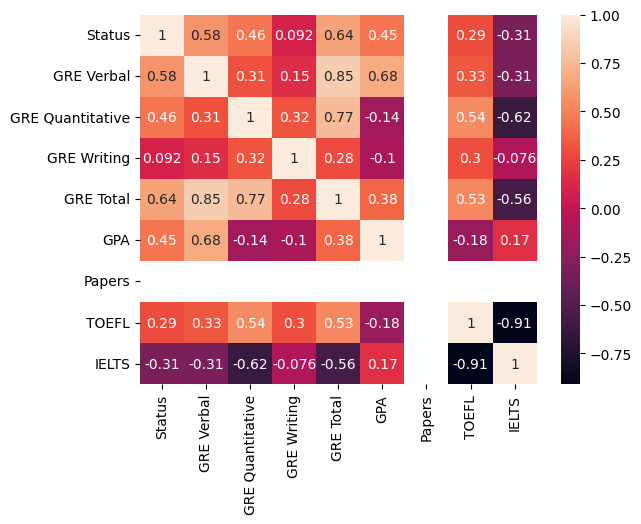

In [14]:
import seaborn as sns
corr_df = df_admitsFYI[(df_admitsFYI['University'] == "Bowling Green State University") & (df_admitsFYI['Target Major'] == "Computer Science")]
corr_df = corr_df.select_dtypes(exclude=['object'])
# display(corr_df)
sns.heatmap(corr_df.corr(), annot=True)

In [15]:
df_admitsFYI.info()
df_admitsFYI["Papers"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 33856 entries, 0 to 39526
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   University        33856 non-null  object 
 1   Status            33856 non-null  int64  
 2   Target Major      33856 non-null  object 
 3   GRE Verbal        33856 non-null  float64
 4   GRE Quantitative  33856 non-null  float64
 5   GRE Writing       33856 non-null  float64
 6   GRE Total         33856 non-null  float64
 7   UG College        33703 non-null  object 
 8   UG Major          33424 non-null  object 
 9   GPA               33856 non-null  float64
 10  Papers            33856 non-null  float64
 11  Work Exp          33856 non-null  object 
 12  Season            33856 non-null  object 
 13  Year              33856 non-null  object 
 14  TOEFL             33856 non-null  float64
 15  IELTS             33856 non-null  float64
dtypes: float64(8), int64(1), object(7)
memory usa

Papers
0.0     31172
1.0      1977
2.0       428
3.0       150
4.0        73
6.0        27
5.0        19
8.0         4
10.0        2
11.0        2
7.0         2
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
universities = df_admitsFYI['University'].unique()
majors = df_admitsFYI['Target Major'].unique()

for uni in universities:
    for major in majors:
        try: 
            subset = df_admitsFYI[(df_admitsFYI['University'] == uni) & (df_admitsFYI['Target Major'] == major)]
            subset = subset.select_dtypes(exclude=['object'])
            # Split data into training and testing sets
            
            X_train, X_test, y_train, y_test = train_test_split(subset.drop('Status', axis=1), subset['Status'], test_size=0.2, random_state=42)
            
            model = LogisticRegression()
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(f"Accuracy for {uni} - {major} is {accuracy}")
            
            # recall and precision
            
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            print(f"Recall for {uni} - {major} is {recall}")
            print(f"Precision for {uni} - {major} is {precision}")
            print("\n")
            
            # ROC curve
            # display = RocCurveDisplay.from_estimator(model, X_test, y_test)            
            # display.plot()
            
        except:
            continue

Accuracy for Bowling Green State University - Computer Science is 0.5
Recall for Bowling Green State University - Computer Science is 0.4444444444444444
Precision for Bowling Green State University - Computer Science is 1.0


Accuracy for University of North Carolina, Charlotte - Computer Science is 0.6666666666666666
Recall for University of North Carolina, Charlotte - Computer Science is 0.8636363636363636
Precision for University of North Carolina, Charlotte - Computer Science is 0.7307692307692307


Accuracy for University of North Carolina, Charlotte - Electrical Engineering is 0.6785714285714286
Recall for University of North Carolina, Charlotte - Electrical Engineering is 1.0
Precision for University of North Carolina, Charlotte - Electrical Engineering is 0.6538461538461539


Accuracy for University of North Carolina, Charlotte - Bioinformatics is 1.0
Recall for University of North Carolina, Charlotte - Bioinformatics is 1.0
Precision for University of North Carolina, Charlotte

Things to fix / do : 
1. If Particular Unis and Majors have less than 5 / 10 records , drop them
2. Any particular university having any one of  Admit / Rejects only, drop them.

In [17]:
#Fixing issue 1

#For Universities having less than 6 records, drop them
df= df_admitsFYI.copy()
#Creating a new dataframe consists of Universities and those having a count of less than 6 records
value_drop = df['University'].value_counts().reset_index(name='Count')
value_drop = value_drop[value_drop['Count'] < 6]
value_drop = value_drop['University'].tolist()
#Take only those universities not present in the aforementioned dataframe
df = df[~df['University'].isin(value_drop)]

#For Target Majors having less than 10 records, drop them

#Creating a new dataframe consists of Universities and those having a count of less than 6 records
value_drop = df['Target Major'].value_counts().reset_index(name='Count')
value_drop = value_drop[value_drop['Count'] < 10]
value_drop = value_drop['Target Major'].tolist()
#Take only those universities not present in the aforementioned dataframe
df = df[~df['Target Major'].isin(value_drop)]
df


,University,Status,Target Major,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,UG College,UG Major,GPA,Papers,Work Exp,Season,Year,TOEFL,IELTS
0,Bowling Green State University,0,Computer Science,135.0,146.0,3.0,281.0,SIES Graduate School of Technology,Information Technology,2.2400,0.0,0,Fall,2015,0.0,6.0
1,Bowling Green State University,1,Computer Science,170.0,147.0,4.0,317.0,thapathali engineering campus,ECE,2.9920,0.0,0,Spring,2017,100.0,0.0
3,Bowling Green State University,0,Computer Science,148.0,133.0,3.0,281.0,Vellore Institute of Technology,Computer Science,2.8920,0.0,0,Fall,2016,0.0,6.5
4,Bowling Green State University,1,Computer Science,147.0,136.0,2.0,283.0,Gitam University,Computer Science,2.8000,0.0,0,Spring,2016,0.0,6.0
5,Bowling Green State University,1,Computer Science,154.0,144.0,3.5,298.0,"Institute of Engineering & Science, IPS Academy",Computer Science,2.8040,0.0,0,Fall,2017,97.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39519,Governors State University,1,Computer Science,150.0,142.0,2.5,292.0,"Audisankara Institute of Technology, ASIT",ECE,2.6400,0.0,0,Fall,2017,0.0,6.0
39522,Governors State University,1,Computer Science,155.0,130.0,3.0,285.0,Vignan Institute Of Technology And Science,Computer Science,2.8800,0.0,0,Fall,2019,0.0,6.5
39523,Governors State University,1,Computer Science,143.0,133.0,3.0,276.0,"Jawaharlal Nehru Institute of Technology, Hyde...",Computer Science,2.6000,0.0,0,Fall,2019,0.0,6.0
39525,Governors State University,1,Computer Science,142.0,133.0,2.5,275.0,svist,Computer Science,2.4452,0.0,0,Fall,2019,0.0,6.0


In [18]:
#Fixing issue 2

uni_major_status_counts = df.groupby(['University', 'Target Major', 'Status']).size()
#Groups by university and target major , check the number of records, compares the count for each group to 1 and returns a boolean Series
#It is further grouped on the basis of the boolean Series and if any of the boolean values in the group are True, it will be dropped
to_drop_status = uni_major_status_counts.groupby(level=[0,1]).size().eq(1).groupby(level=[0,1]).any()
to_drop_status_indices = to_drop_status[to_drop_status].index
df = df[~df.set_index(['University', 'Target Major']).index.isin(to_drop_status_indices)]
df

,University,Status,Target Major,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,UG College,UG Major,GPA,Papers,Work Exp,Season,Year,TOEFL,IELTS
0,Bowling Green State University,0,Computer Science,135.0,146.0,3.0,281.0,SIES Graduate School of Technology,Information Technology,2.240,0.0,0,Fall,2015,0.0,6.0
1,Bowling Green State University,1,Computer Science,170.0,147.0,4.0,317.0,thapathali engineering campus,ECE,2.992,0.0,0,Spring,2017,100.0,0.0
3,Bowling Green State University,0,Computer Science,148.0,133.0,3.0,281.0,Vellore Institute of Technology,Computer Science,2.892,0.0,0,Fall,2016,0.0,6.5
4,Bowling Green State University,1,Computer Science,147.0,136.0,2.0,283.0,Gitam University,Computer Science,2.800,0.0,0,Spring,2016,0.0,6.0
5,Bowling Green State University,1,Computer Science,154.0,144.0,3.5,298.0,"Institute of Engineering & Science, IPS Academy",Computer Science,2.804,0.0,0,Fall,2017,97.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39457,"George Washington University, Mount Vernon Col...",1,MIS,160.0,148.0,3.0,308.0,Jaypee Institute of Information Technology,Information Technology,2.440,0.0,0,Fall,2012,106.0,0.0
39458,"George Washington University, Mount Vernon Col...",1,MIS,163.0,153.0,4.0,316.0,"MPSTME, NMIMS",Information Technology,1.540,0.0,0,Fall,2014,103.0,0.0
39460,"George Washington University, Mount Vernon Col...",1,MIS,158.0,159.0,3.0,317.0,University of Mumbai,Computer Science,2.200,0.0,0,Fall,2011,102.0,0.0
39461,"George Washington University, Mount Vernon Col...",1,MIS,166.0,162.0,4.0,328.0,NaN,Computer Science,2.740,0.0,0,Fall,2012,115.0,0.0


Alternative Approach

In [19]:

df= df_admitsFYI.copy()
uni_major_status_counts = df.groupby(['University', 'Target Major', 'Status']).size()
to_drop_status = uni_major_status_counts.groupby(level=[0,1]).size().eq(1).groupby(level=[0,1]).any()
to_drop_status_indices = to_drop_status[to_drop_status].index
df = df[~df.set_index(['University', 'Target Major']).index.isin(to_drop_status_indices)]
df

,University,Status,Target Major,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,UG College,UG Major,GPA,Papers,Work Exp,Season,Year,TOEFL,IELTS
0,Bowling Green State University,0,Computer Science,135.0,146.0,3.0,281.0,SIES Graduate School of Technology,Information Technology,2.240,0.0,0,Fall,2015,0.0,6.0
1,Bowling Green State University,1,Computer Science,170.0,147.0,4.0,317.0,thapathali engineering campus,ECE,2.992,0.0,0,Spring,2017,100.0,0.0
3,Bowling Green State University,0,Computer Science,148.0,133.0,3.0,281.0,Vellore Institute of Technology,Computer Science,2.892,0.0,0,Fall,2016,0.0,6.5
4,Bowling Green State University,1,Computer Science,147.0,136.0,2.0,283.0,Gitam University,Computer Science,2.800,0.0,0,Spring,2016,0.0,6.0
5,Bowling Green State University,1,Computer Science,154.0,144.0,3.5,298.0,"Institute of Engineering & Science, IPS Academy",Computer Science,2.804,0.0,0,Fall,2017,97.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39457,"George Washington University, Mount Vernon Col...",1,MIS,160.0,148.0,3.0,308.0,Jaypee Institute of Information Technology,Information Technology,2.440,0.0,0,Fall,2012,106.0,0.0
39458,"George Washington University, Mount Vernon Col...",1,MIS,163.0,153.0,4.0,316.0,"MPSTME, NMIMS",Information Technology,1.540,0.0,0,Fall,2014,103.0,0.0
39460,"George Washington University, Mount Vernon Col...",1,MIS,158.0,159.0,3.0,317.0,University of Mumbai,Computer Science,2.200,0.0,0,Fall,2011,102.0,0.0
39461,"George Washington University, Mount Vernon Col...",1,MIS,166.0,162.0,4.0,328.0,NaN,Computer Science,2.740,0.0,0,Fall,2012,115.0,0.0


The columns listed could be dropped. Doesn't really have any data for us to work with.

In [20]:


adf = df.groupby(['University', 'Target Major'])['Status'].count().reset_index()
adf=adf[adf['Status'] <4]
#value_drop = value_drop[['University','Target Major']].tolist()
# value_drop
adf


,University,Target Major,Status
187,"George Washington University, Virginia Campus",Bioinformatics,2
188,"George Washington University, Virginia Campus",EECS,2
190,"George Washington University, Virginia Campus",Information Systems,3
191,"George Washington University, Virginia Campus",Telecommunication Engineering,3
227,Harvard University,Architecture,3
228,Harvard University,Bioinformatics,2
254,Illinois State University,Information Technology,2
278,Iowa State University,Engineering Management,3
279,Iowa State University,Environmental Engineering,3
284,Johns Hopkins University,Chemical Engineering,2


In [21]:
#Just Checking specific unis and majors
df[(df['University']=='University of North Carolina, Charlotte') & (df['Target Major']=='Bioinformatics')]
# df[df['University']=='Harvard University']

,University,Status,Target Major,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,UG College,UG Major,GPA,Papers,Work Exp,Season,Year,TOEFL,IELTS
150,"University of North Carolina, Charlotte",1,Bioinformatics,155.0,148.0,3.0,303.0,Manipal Institute of Technology,Biotechnology,2.464,1.0,0,Fall,2020,0.0,0.0
151,"University of North Carolina, Charlotte",1,Bioinformatics,164.0,154.0,3.5,318.0,Bangladesh University of Engineering and Techn...,Mechanical Engineering,2.160,0.0,0,Fall,2019,95.0,0.0
152,"University of North Carolina, Charlotte",0,Bioinformatics,162.0,142.0,4.0,304.0,JNTUH College of Engineering Jagitial,EEE,2.760,0.0,30,Fall,2020,0.0,7.5
153,"University of North Carolina, Charlotte",1,Bioinformatics,164.0,161.0,4.5,325.0,Anna University,NaN,3.684,0.0,0,Fall,2014,118.0,0.0
154,"University of North Carolina, Charlotte",0,Bioinformatics,155.0,150.0,3.0,305.0,JNTU,Biotechnology,2.800,0.0,0,Spring,2013,94.0,0.0
22572,"University of North Carolina, Charlotte",1,Bioinformatics,155.0,148.0,3.0,303.0,Manipal Institute of Technology,Biotechnology,2.464,1.0,0,Fall,2020,0.0,0.0
22573,"University of North Carolina, Charlotte",1,Bioinformatics,164.0,154.0,3.5,318.0,Bangladesh University of Engineering and Techn...,Mechanical Engineering,2.160,0.0,0,Fall,2019,95.0,0.0
22574,"University of North Carolina, Charlotte",0,Bioinformatics,162.0,142.0,4.0,304.0,JNTUH College of Engineering Jagitial,EEE,2.760,0.0,30,Fall,2020,0.0,7.5
22575,"University of North Carolina, Charlotte",1,Bioinformatics,164.0,161.0,4.5,325.0,Anna University,NaN,3.684,0.0,0,Fall,2014,118.0,0.0
22576,"University of North Carolina, Charlotte",0,Bioinformatics,155.0,150.0,3.0,305.0,JNTU,Biotechnology,2.800,0.0,0,Spring,2013,94.0,0.0


### Implementing Classifiers

Method 1

This has been done with Stratified sampling. Takes into account the class imbalance in the dataset.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
universities = df['University'].unique()
majors = df['Target Major'].unique()
c=0

for uni in universities:
    for major in majors:
        try: 
            subset = df[(df['University'] == uni) & (df['Target Major'] == major)]
            subset = subset.select_dtypes(exclude=['object'])
            X = subset.drop('Status', axis=1)
            y = subset['Status']
            # Split data into training and testing sets
            
            X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)
            
            model = LogisticRegression()
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(f"Accuracy for {uni} - {major} is {accuracy}")
            
            # recall and precision
            
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            print(f"Recall for {uni} - {major} is {recall}")
            print(f"Precision for {uni} - {major} is {precision}")
            print("\n")

            c+=1
            print (c)            
            
            # ROC curve
            # display = RocCurveDisplay.from_estimator(model, X_test, y_test)            
            # display.plot()
            
        except:
            continue

Accuracy for Bowling Green State University - Computer Science is 0.9
Recall for Bowling Green State University - Computer Science is 1.0
Precision for Bowling Green State University - Computer Science is 0.8888888888888888


1
Accuracy for University of North Carolina, Charlotte - Computer Science is 0.6333333333333333
Recall for University of North Carolina, Charlotte - Computer Science is 0.8095238095238095
Precision for University of North Carolina, Charlotte - Computer Science is 0.7083333333333334


2
Accuracy for University of North Carolina, Charlotte - Electrical Engineering is 0.6071428571428571
Recall for University of North Carolina, Charlotte - Electrical Engineering is 0.8421052631578947
Precision for University of North Carolina, Charlotte - Electrical Engineering is 0.6666666666666666


3
Accuracy for University of North Carolina, Charlotte - Bioinformatics is 1.0
Recall for University of North Carolina, Charlotte - Bioinformatics is 1.0
Precision for University of Nort

Method 2

his has been done with SMOTE. 
This generates synthetic examples of the minority class and balance the training set.
Takes into account the class imbalance in the dataset.

In [23]:
from imblearn.over_sampling import SMOTE
#from unbalanced_dataset import UnderSampler, OverSampler, SMOTE


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
universities = df['University'].unique()
majors = df['Target Major'].unique()
c=0

for uni in universities:
    for major in majors:
        try: 
            subset = df[(df['University'] == uni) & (df['Target Major'] == major)]
            subset = subset.select_dtypes(exclude=['object'])
            X = subset.drop('Status', axis=1)
            y = subset['Status']
            # Split data into training and testing sets
            
            X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)
            smote = SMOTE()
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
            
            model = LogisticRegression()
            model.fit(X_train_resampled, y_train_resampled)
            
            
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(f"Accuracy for {uni} - {major} is {accuracy}")
            
            # recall and precision
            
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            print(f"Recall for {uni} - {major} is {recall}")
            print(f"Precision for {uni} - {major} is {precision}")
            print("\n")

            c+=1
            print (c)
            
            # ROC curve
            # display = RocCurveDisplay.from_estimator(model, X_test, y_test)            
            # display.plot()
            
        except:
            continue


Accuracy for Bowling Green State University - Computer Science is 0.7
Recall for Bowling Green State University - Computer Science is 0.75
Precision for Bowling Green State University - Computer Science is 0.8571428571428571


1
Accuracy for University of North Carolina, Charlotte - Computer Science is 0.6
Recall for University of North Carolina, Charlotte - Computer Science is 0.5714285714285714
Precision for University of North Carolina, Charlotte - Computer Science is 0.8


2
Accuracy for University of North Carolina, Charlotte - Electrical Engineering is 0.6071428571428571
Recall for University of North Carolina, Charlotte - Electrical Engineering is 0.631578947368421
Precision for University of North Carolina, Charlotte - Electrical Engineering is 0.75


3
Accuracy for University of North Carolina, Charlotte - Civil Engineering is 0.6451612903225806
Recall for University of North Carolina, Charlotte - Civil Engineering is 0.65
Precision for University of North Carolina, Charlotte 